<h1><p style="display: block; text-align: center;">Map it with Python!</p></h1>

<h3><p style="display: block; text-align: center;">Intro to GIS and Python's Mapping Modules</p></h3>

<h5><p style="display: block; text-align: center;">Christy Heaton</p></h5>

<h1><p style="display: block; text-align: center;">About me</p></h1>

![title](img/FS_bio.PNG) 

![title](img/maptimeseattle_website.PNG) 

Find us on [Meetup!](https://www.meetup.com/MaptimeSEA)

![title](img/psfblog_nbpy.PNG) 

<h1><p style="display: block; text-align: center;">This presentation is running inside of a Jupyter Notebook</p></h1>

In [1]:
import platform
print('Using Python version', platform.python_version())

Using Python version 3.7.0


## Let's talk about maps

![title](img/wmata-metro-map.jpg) 

https://washington-org.s3.amazonaws.com/s3fs-public/styles/editorial_wide/public/wmata-metro-map.jpg

![title](img/wa_post_eclipse.PNG)

Source: [Washington Post](https://www.washingtonpost.com/graphics/national/eclipse/?utm_term=.72bbec293d53)

![title](img/00103052.jpg) 

Historic Petaluma Map Source: https://www.davidrumsey.com/luna/servlet/detail/RUMSEY~8~1~1173~100052:Map-of-Petaluma-City--1877-

![title](img/financial-networks-and-cartography-2-638.jpg) 

1854 London Cholera Map Source: https://image.slidesharecdn.com/130409-financial-networkscrc-130411091407-phpapp02/95/financial-networks-and-cartography-2-638.jpg?cb=1365671703


<h2><p style="display: block; text-align: center;">Hasn't Everything Already Been Mapped?</p></h2>

<h2><p style="display: block; text-align: center;">Base Maps vs. Thematic Maps</p></h2>

## Base Maps

* Used as a reference

* They show you what's there, or a subset of what's there depending on scale

![title](img/nearmap_petaluma.PNG) 

Source: [Nearmap](https://go.nearmap.com/)

![title](img/stamen_maps.PNG) 

Source: [Stamen](http://maps.stamen.com)

![title](img/OSM_Edit.PNG) 

Source: [OpenStreetMap](https://www.openstreetmap.org)

### Not all base maps have been made because:

* Changes in landscapes and infrastructure

* Different colors

* Different scales

* Different features

## Thematic Maps

* A map with a theme (usually shown on top of a basemap)

* The theme is _there_, but would not be seen from above

![title](img/nasa_eclipse_map.jpg) 

Source: [NASA](https://eclipse2017.nasa.gov/eclipse-maps)

![title](img/Climate-destabilisation.jpg) 

Source: [Geoawesomeness](https://i1.wp.com/geoawesomeness.com/wp-content/uploads/2016/10/Climate-destabilisation.jpg?fit=1303%2C766)

![title](img/wind_map.PNG) 

Source: [hint.fm](http://hint.fm/wind/)

## Non-Earth Maps

![title](img/Hubble_image.PNG) 

Source: Nasa (https://www.nasa.gov/image-feature/goddard/2018/hubbles-warped-view-of-the-universe)

![title](img/frodo_middleearth.jpg)

Middle Earth Map Source: https://www.reddit.com/r/lotr/comments/1870r9/map_of_characters_paths_through_the_books_my/

## What is GIS?

* A system that allows you to visualize, analyze, and store data to understand spatial relationships, patterns, and trends

* GIS is widely used in organizations of all sizes and in almost every industry

* A mix of data, science, analysis, and maps

## We use GIS to Answer _Where_ Questions

* Where is the Mystic Theater and how do I get there?

* Where should we build a store/wind turbine/solar panel?

* Where will the hurricane hit and what cities will be impacted?

* Where is the highest concentration of arsenic in our port?

* Where should we place advertisements so that people see them who are most likely to buy our product?

# Spatial Data - A Few Things to Know

![title](img/spatial_data.png) 

![title](img/projection.png) 

## Depending on what projection you choose, you will get distortion in:

* Area
* Angles
* Shape
* Distance
* Direction


![title](img/projections.png)

<h2>Mercator Projection</h2>

![title](img/mp_Mercator-s60.png)

![title](img/GreatCircles.PNG) 

Source: [Carto and Joel Masselink](https://jmasselink.carto.com/builder/c72f6b3f-309e-43d8-9d2e-fa0c466597f4/embed)

![title](img/mercator_realsize.png) 

Source: [@neilrkaye](https://twitter.com/neilrkaye/status/1050722881657864192)

<h2>Robinson Projection</h2>

![title](img/Robinson_projection.jpg) 

<h2>Plate Carrée Projection</h2>

![title](img/Plate-Carree.png)

![title](img/ProjectionWizard.PNG) 

<h2>Coordinate Systems</h2>

![title](img/CoordSysPlane.png) 

![title](img/Geog_vs_Projected_CRS.png)

<h2>Geographic/Unprojected Coordinate System</h2>

![title](img/latlong-150.JPG)

<h2>Plate Carrée Projection</h2>

![title](img/Plate-Carree.png)

![title](img/null_island_round.png)

![title](img/null_island_flat.png)

![title](img/epsgIO.png)

Source: [epsg.io](http://epsg.io/)

# Python Mapping Libraries

## [Matplotlib](https://matplotlib.org/)

#### A Python plotting library which produces publication quality maps and diagrams in both static and interactive formats. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## [Shapely](https://pypi.org/project/Shapely)

#### A Python package for manipulation and analysis of planar geometric objects.

In [3]:
from shapely.geometry import Point

## [Pandas](https://pandas.pydata.org/)

#### Provides high-performance, easy-to-use data structures and data analysis tools

## [GeoPandas](http://geopandas.org/)

#### Geographically-enabled Pandas

In [4]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries

In [5]:
# Create a GeoSeries by adding some points
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [6]:
# Set the Coordinate Reference System (WGS84 Lat/Long)
gs.crs = {'init': 'epsg:4326'}

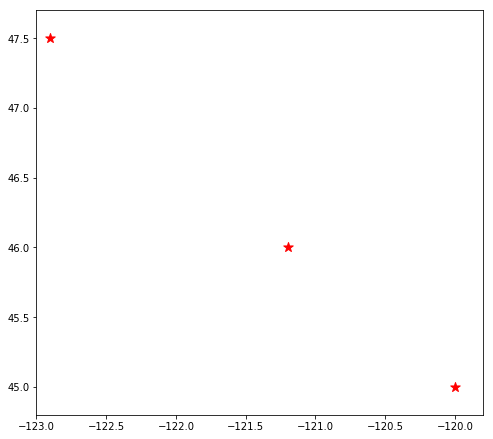

In [7]:
# We can plot our points with the plot function, with some customizations
gs.plot(marker='*', color='red', markersize=100, figsize=(8, 8))

# We limit the bounds to our area, but this will happen by default
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

In [8]:
# GeoPandas comes with some data that we can quickly load in
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [9]:
# And check out the top few rows - notice it comes with attributes like population and GDP, as well as geometry 
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


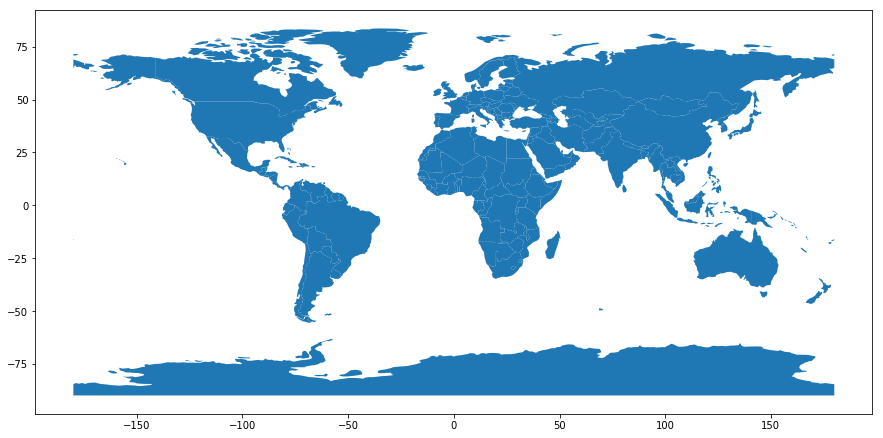

In [10]:
# Use the plot method to view the spatial component
world.plot(figsize=(15,10))

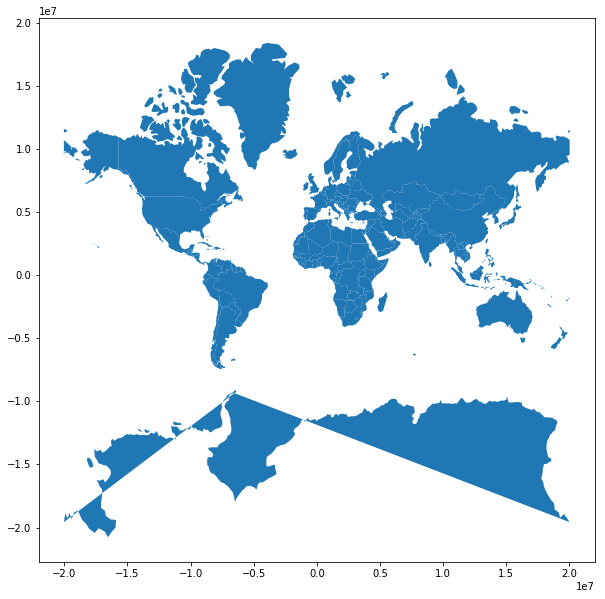

In [11]:
# You can change the projection/crs of the data
world = world.to_crs({'init': 'epsg:3395'})
world.plot(figsize=(10,10))

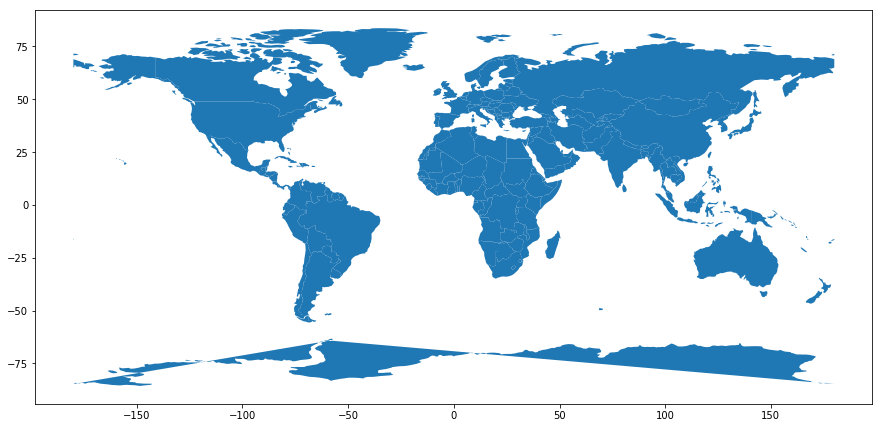

In [12]:
# At this scale, this causes issues with Antarctica
world = world.to_crs({'init': 'epsg:4326'})
world.plot(figsize=(15,10))

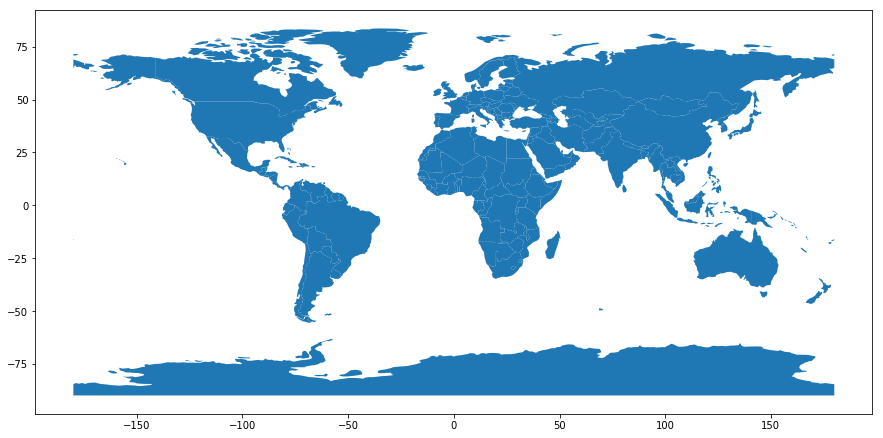

In [13]:
# So let's load it in fresh
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(15,10))

In [14]:
# GeoPandas also comes with some city data
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [15]:
# View the top few rows
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


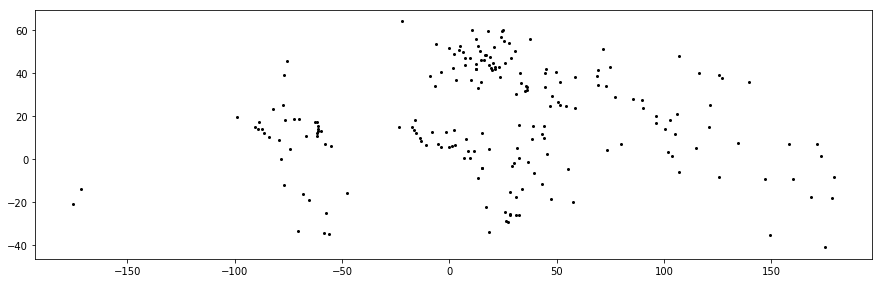

In [16]:
# And plot to view the spatial component
cities.plot(figsize=(15,10), color='black', markersize=4)

# We're now ready to make a map! Let's calculate the GDP per capita of the countries

In [17]:
# Antarctica messes up our analysis, so let's redefine world to exclude it
world = world[(world.pop_est>0) & (world.name!="Antarctica") & (world.name!="Fr. S. Antarctic Lands")]

In [18]:
# Now we make a new column that is our GPD per capita calculation
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [19]:
# Let's examine our new column
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


In [20]:
# Let's sort and look at the top few results
world.sort_values('gdp_per_cap', ascending = False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
133,833285.0,Asia,Qatar,QAT,91330.0,"POLYGON ((50.81010827006958 24.75474253997138,...",0.109602
97,491775.0,Europe,Luxembourg,LUX,39370.0,"POLYGON ((6.043073357781111 50.12805166279423,...",0.080057
118,4676305.0,Europe,Norway,NOR,276400.0,(POLYGON ((28.16554731620292 71.18547435168051...,0.059106
89,2691158.0,Asia,Kuwait,KWT,149100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4...",0.055404
23,388190.0,Asia,Brunei,BRN,20250.0,"POLYGON ((114.2040165548284 4.525873928236805,...",0.052165


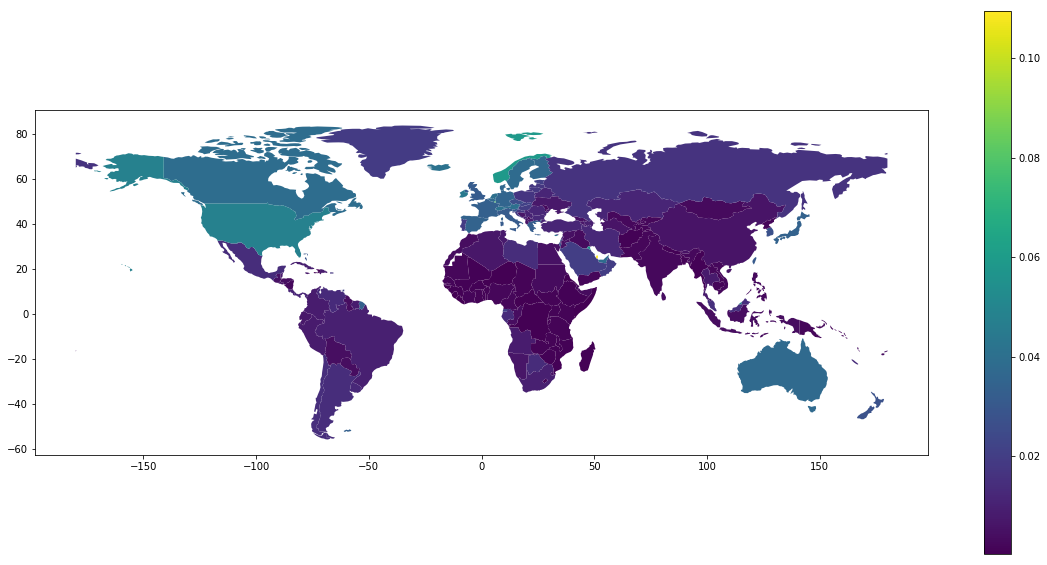

In [21]:
# We can plot the map, coloring our countries by their gdp_per_cap value, creating a choropleth map
world.plot(column='gdp_per_cap', figsize=(20,10), legend=True)

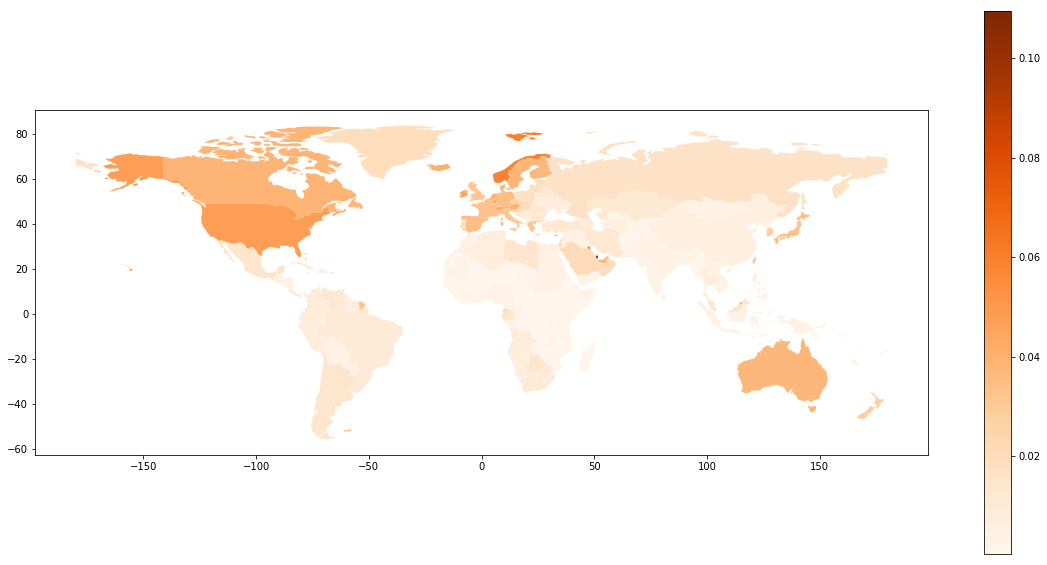

In [22]:
# We have some options with how our map is colored
world.plot(column='gdp_per_cap', cmap='Oranges', figsize=(20,10), legend=True)

C:\Users\chris\Miniconda3\envs\geopandasenv\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\chris\Miniconda3\envs\geopandasenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


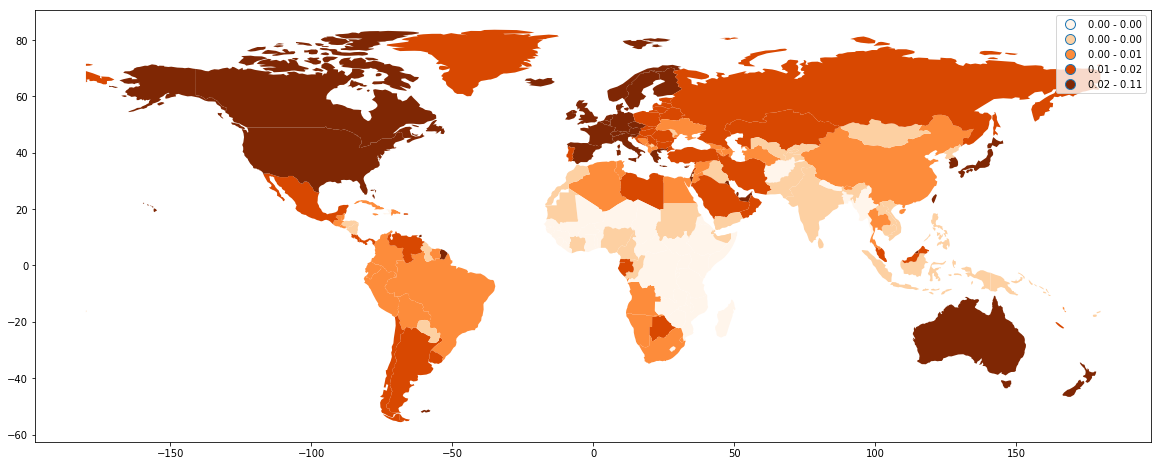

In [23]:
# We can also choose a different classicication scheme
world.plot(column='gdp_per_cap', cmap='Oranges', scheme='quantiles', figsize=(20,10), legend=True)

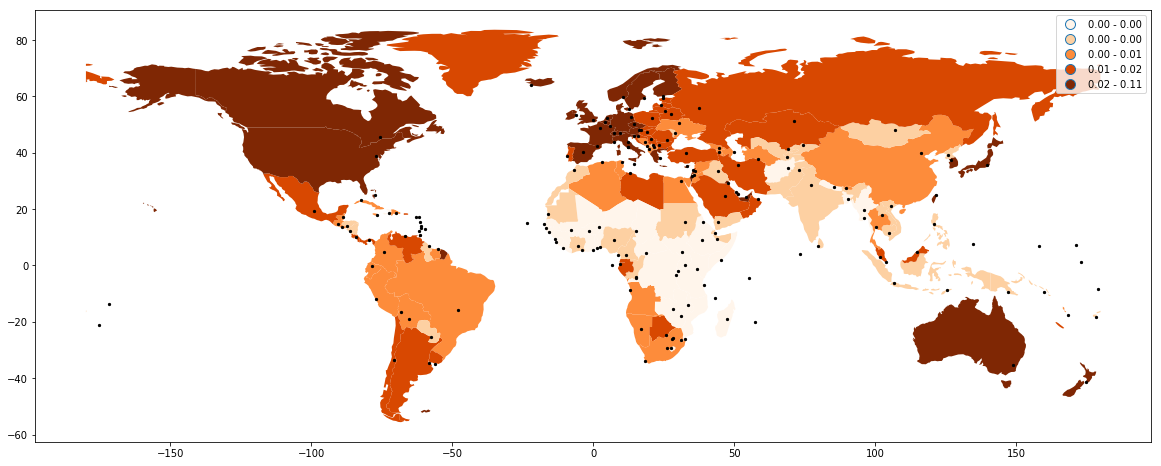

In [24]:
# Let's put our countries and cities on the same map
base = world.plot(column='gdp_per_cap', cmap='Oranges', scheme='quantiles', figsize=(20,10), legend=True)
cities.plot(ax=base, marker='o', color='black', markersize=5)

<BarContainer object of 5 artists>

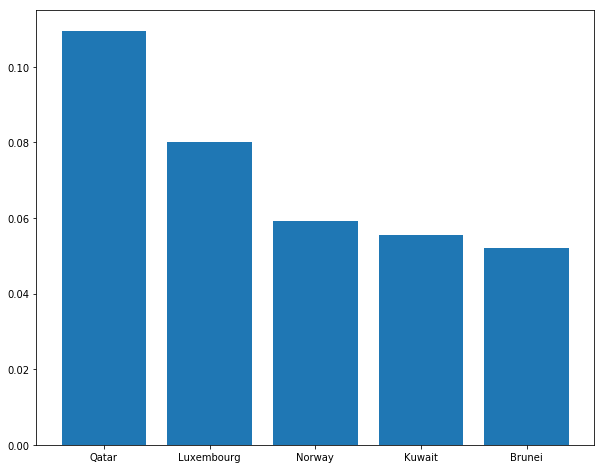

In [25]:
# Reminder, we can also make neat charts using Pandas
fig, ax = plt.subplots(figsize=(10,8))
y = world.sort_values('gdp_per_cap', ascending = False)['gdp_per_cap'][:5]
x = world.sort_values('gdp_per_cap', ascending = False)['name'][:5]
ax.bar(x,y)

# Spatial Problem: In what cities will we be able to see upcoming solar eclipses?

![title](img/_alignment-lines-720.png)

An eclipse of the sun, or solar eclipse, happens when the moon moves between the sun and Earth. When this happens, the moon blocks the light of the sun from reaching Earth. There was a widely publicized solar eclipse that passed over the contiguous United States in 2017. Let's re-live the excitment by finding out where we can see solar eclipses in the future, using Python!

![title](img/Corona-2017-Aug-21-m.jpg)

In [26]:
# We'll need to load in some local data
import os
data_pth = "../Data/" 

In [27]:
# Load in Eclipse data
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))

In [28]:
# Examine the first few rows
eclipses.head()

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1..."
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -..."
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -..."
3,0,Umbra,274.491359,757.922577,2021,POLYGON Z ((-51.18286999999998 -53.08708999999...
4,0,Umbra Limit (East),267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...


In [29]:
# Check the coorindate reference system - very important!
eclipses.crs

{'init': 'epsg:4326'}

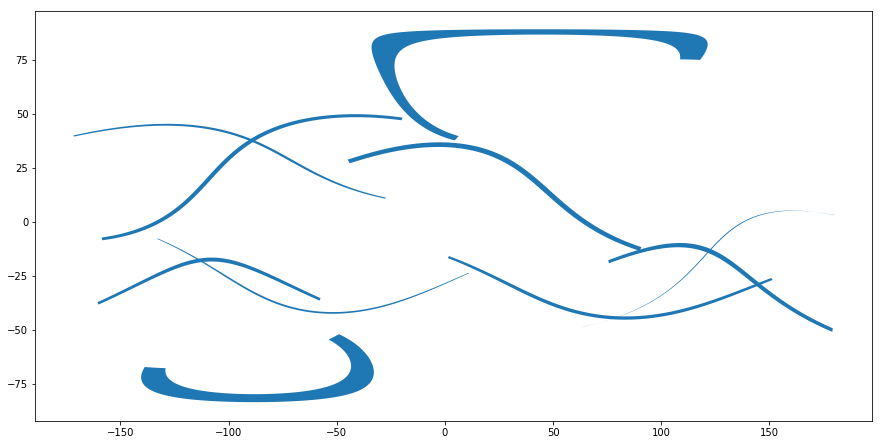

In [30]:
# And let's plot
eclipses.plot(figsize=(15,10))

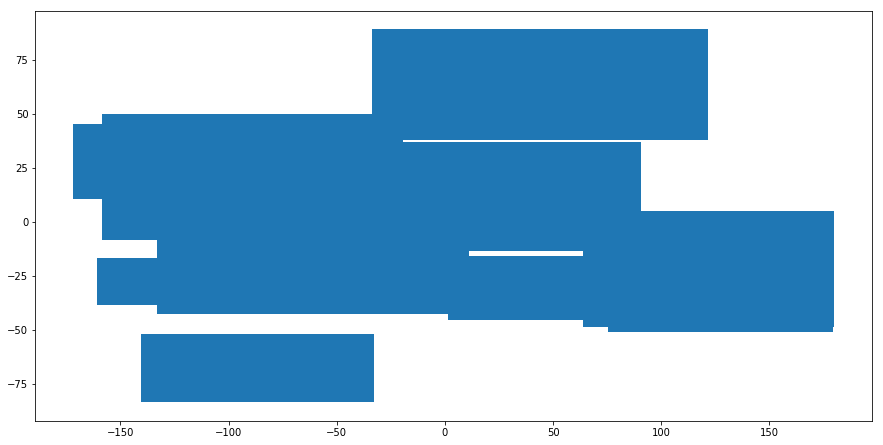

In [31]:
# GeoPandas let's you plot the minimum bounding box of each entity
eclipses.envelope.plot(figsize=(15,10))

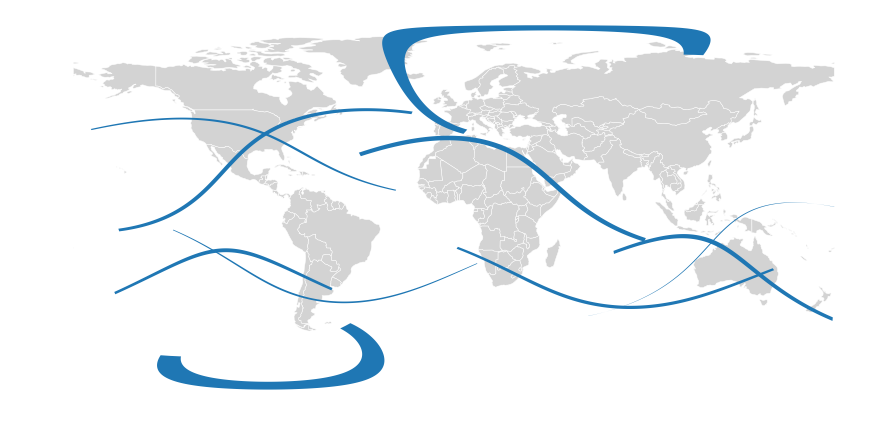

In [32]:
# Let's re-load in our world data, and plot the eclipses on top of it
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base)
base.set_axis_off()

(-197.99999999999994, 198.00000000000014, -91.91611699999996, 97.6886170000001)

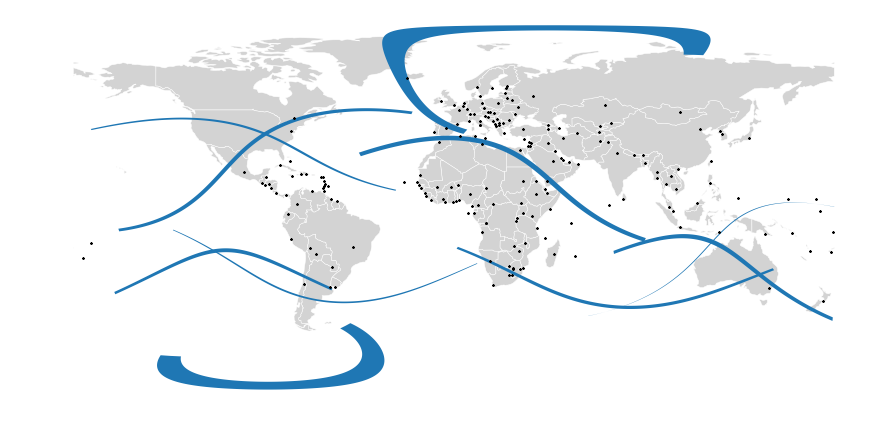

In [33]:
# Now we'll plot our basemap, our eclipse paths, and our cities
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base)
cities.plot(marker='*', color='black', markersize=4, ax=base)
base.axis('off')

In [34]:
# I have a dataset with a lot more cities in it, so let's redefine cities to use that
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [35]:
# And examine the first few rows
cities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry
0,Admin-1 capital,Colonia del Sacramento,Uruguay,Colonia,-34.479999,-57.840002,21714,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-57.84000247340134 -34.47999900541754)
1,Admin-1 capital,Trinidad,Uruguay,Flores,-33.543999,-56.900997,21093,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.90099656015872 -33.5439989373607)
2,Admin-1 capital,Fray Bentos,Uruguay,Río Negro,-33.138999,-58.303997,23279,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-58.3039974719095 -33.1389990288435)
3,Admin-1 capital,Canelones,Uruguay,Canelones,-34.538004,-56.284001,19698,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.28400149324307 -34.53800400667546)
4,Admin-1 capital,Florida,Uruguay,Florida,-34.099002,-56.214998,32234,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.21499844799416 -34.09900200521719)


In [36]:
# Check the crs of our new cities data
cities.crs

{'init': 'epsg:4326'}

In [37]:
# Is the cities data still in the same crs as the eclipse data? It needs to be to plot correctly!
eclipses.crs == cities.crs

True

(-197.99999999999994, 198.00000000000014, -91.91611699999996, 97.6886170000001)

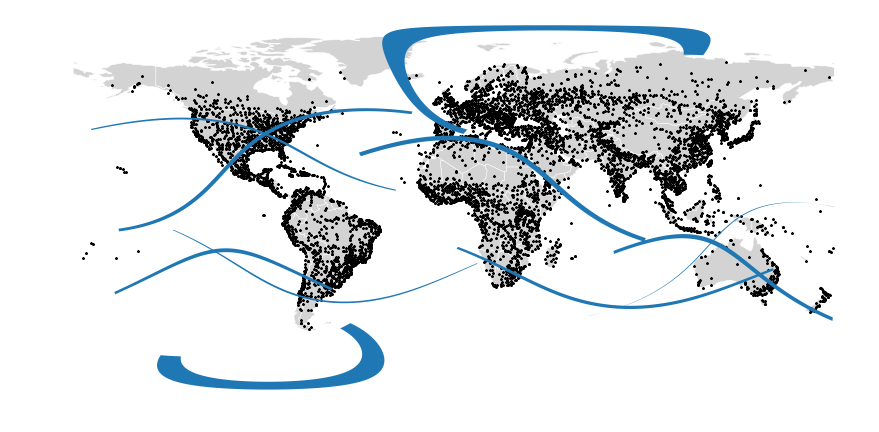

In [38]:
# Great. Let's plot it all again
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(marker='*', color='black', markersize=5, ax=base)
eclipses.plot(ax=base)
base.axis('off')

(-197.99999999999994, 198.00000000000014, -91.91611699999996, 97.6886170000001)

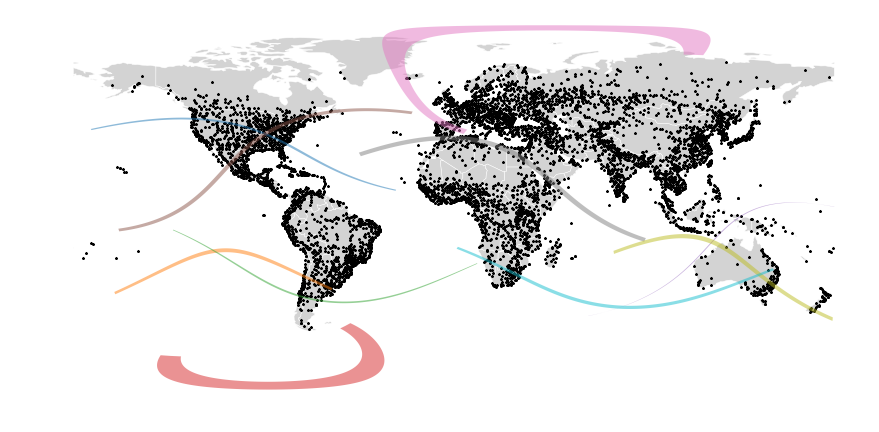

In [39]:
# Let's change our eclipse colors and transparency
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(marker='*', color='black', markersize=5, ax=base)
eclipses.plot(ax=base, cmap='tab10', alpha=0.5)
base.axis('off')

In [40]:
# We can examine the years that we have data for
eclipses['Year']

0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

(-197.99999999999994, 198.00000000000014, -91.91611699999996, 97.6886170000001)

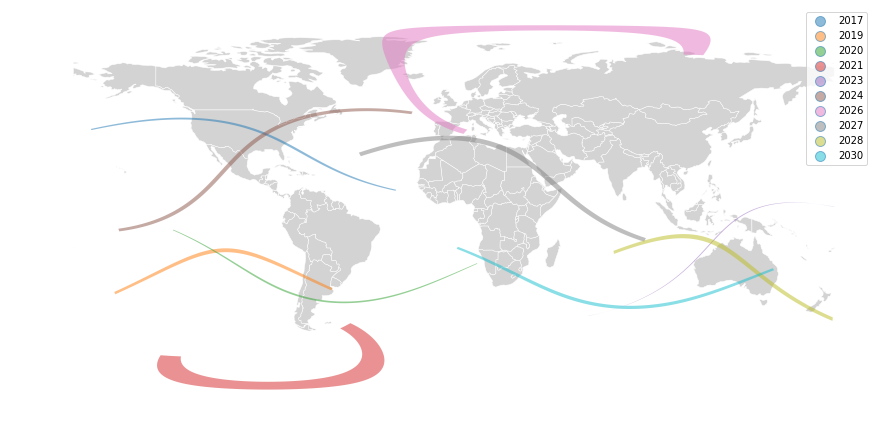

In [41]:
# But how do we know which is which?
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))

# We can add a catetorical value and set the column to Year. We can also add a legend.
eclipses.plot(ax=base, cmap='tab10', alpha=0.5, categorical = True, column = "Year", legend=True)
base.axis('off')

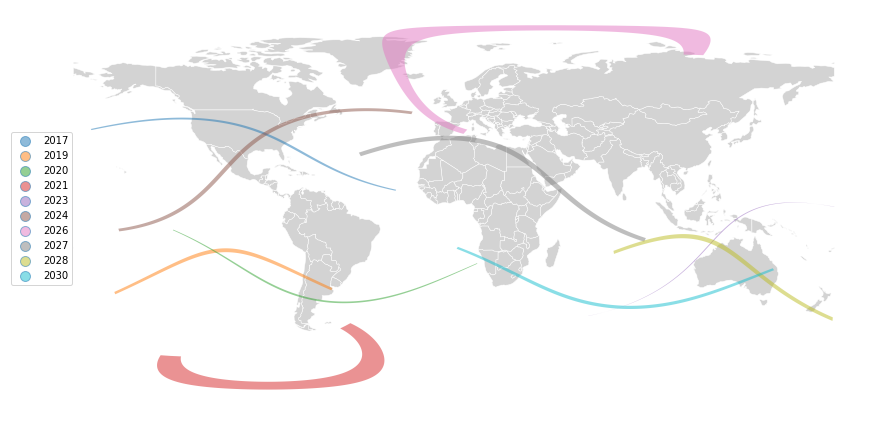

In [42]:
# Let's get that legend out of the way.
base.get_legend().set_bbox_to_anchor((.05,.7))
base.get_figure()

## Which eclipses will cover the largest population?

### Instead of coloring the eclipses by year, we want to color based on the number of people that ought to be able to see them

In [43]:
# Start by getting all the cities that intersect any eclipse
allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')
allecities.head(3)

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry,index_right,OID_,Name,Shape_Leng,Shape_Area,Year
12,Admin-1 capital,Kasserine,Tunisia,Kasssrine,35.216703,8.716699,76243,0.0,None,"No GeoNames match due to small population, not...",None,POINT (8.716698503320458 35.21670310482421),7,0,Umbra,303.52546,325.721626,2027
13,Admin-1 capital,Sdid Bouzid,Tunisia,Sidi Bou Zid,35.016696,9.500004,42098,0.0,Africa/Tunis,GeoNames spatial join with similar names only.,None,POINT (9.500004482255633 35.01669607914971),7,0,Umbra,303.52546,325.721626,2027
15,Admin-1 capital,Mahdia,Tunisia,Mahdia,35.483913,11.040877,45977,0.0,None,None,None,POINT (11.04087661532196 35.48391304450269),7,0,Umbra,303.52546,325.721626,2027


In [44]:
allecities = pd.DataFrame(allecities[['POP', 'Year']])

In [45]:
allecities.head(3)

,POP,Year
12,76243,2027
13,42098,2027
15,45977,2027


In [46]:
# Create a temporary variable to hold our years and populations
g = allecities.groupby(['Year'])[["POP"]].sum()

In [47]:
g

,POP
Year,
2017,6259810
2019,1064173
2020,352237
2023,103610
2024,27774481
2026,5410608
2027,22032732
2028,5175798
2030,4784330


In [48]:
# Add that column to our eclipse data, joining on the Year column
eclipses_pop = pd.merge(eclipses, g, left_on='Year', right_index=True)

In [49]:
# Now we have populations associated with each eclipse
eclipses_pop.head(5)

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry,POP
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1...",6259810
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -...",1064173
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -...",352237
4,0,Umbra Limit (East),267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...,103610
5,0,Umbra,315.537741,253.727828,2024,"POLYGON Z ((-158.5096 -7.820039999999949 0, -1...",27774481


(-197.99999999999994, 198.00000000000014, -62.84593249999997, 96.3043225000001)

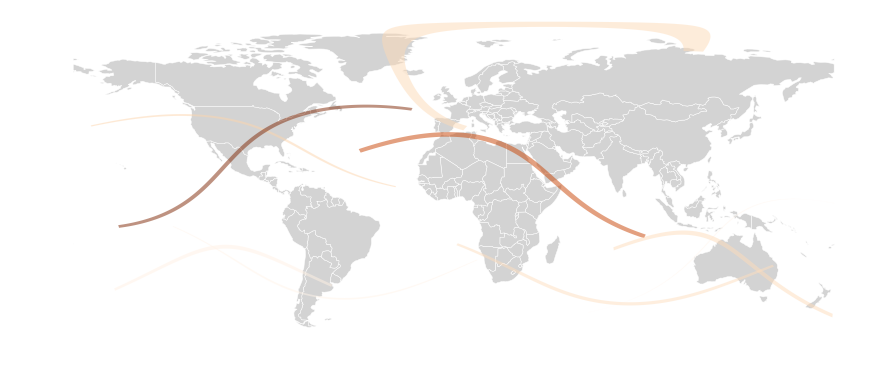

In [50]:
# Let's plot this
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses_pop.plot(ax=base, cmap='Oranges', alpha=0.5, column = "POP")
base.axis('off')

In [51]:
# Sort the results to find out which eclipse will cover the most people
g.sort_values('POP', ascending = False)

,POP
Year,
2024,27774481
2027,22032732
2017,6259810
2026,5410608
2028,5175798
2030,4784330
2019,1064173
2020,352237
2023,103610


## Its the one coming up in 2024! Let's take a closer look at that one.

In [52]:
# Let's look at our options again
eclipses['Year']

0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

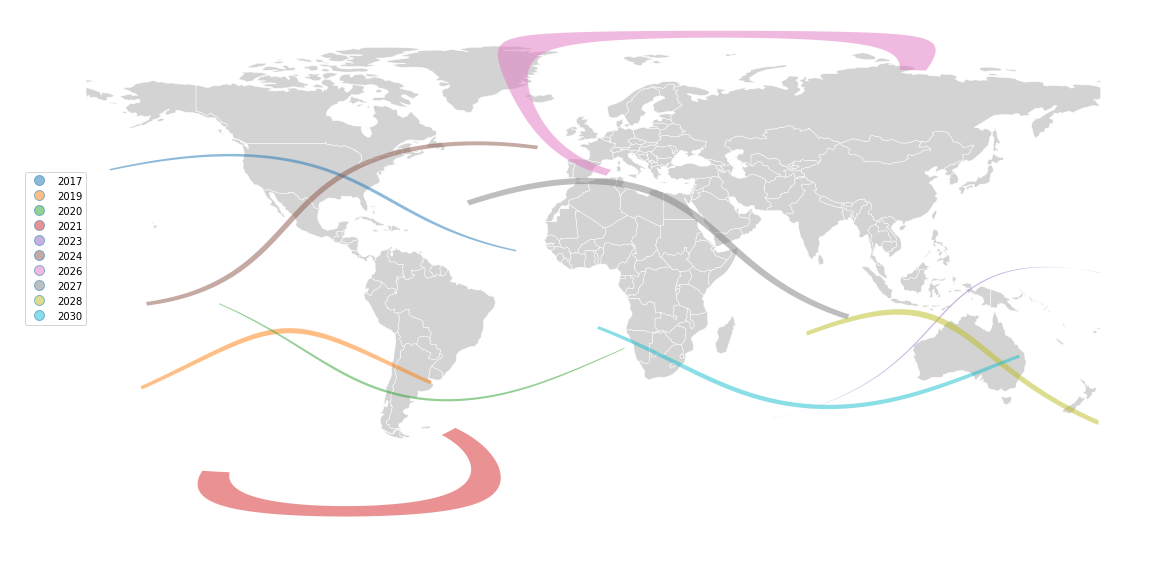

In [53]:
# And plot again
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,10))
eclipses.plot(ax=base, cmap='tab10', categorical=True, alpha=0.5, column = "Year", legend=True)
base.axis('off')
base.get_legend().set_bbox_to_anchor((.05,.7))

In [54]:
# Let's assign the 2024 eclipse to its own variable
myeclipse = eclipses[(eclipses['Year'] == 2024)]

(-197.99999999999994,
 198.00000000000014,
 -62.57467799999996,
 90.60797800000002)

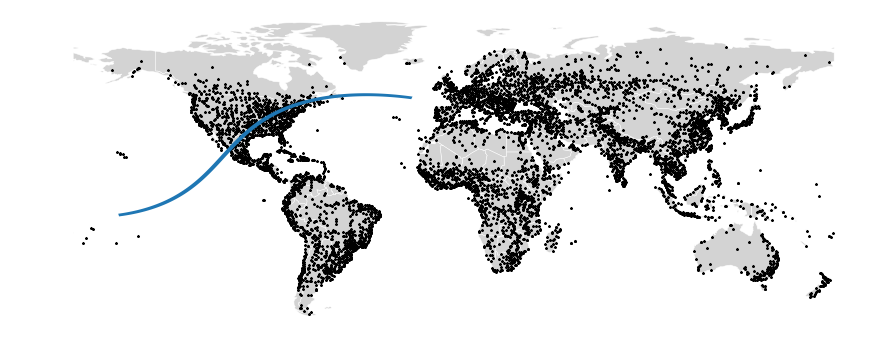

In [55]:
# Let's plot it 
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(marker='*', color='black', markersize=5, ax=base)
myeclipse.plot(ax=base)
base.axis('off')

(-13.450309999999945, 54.82445000000007)

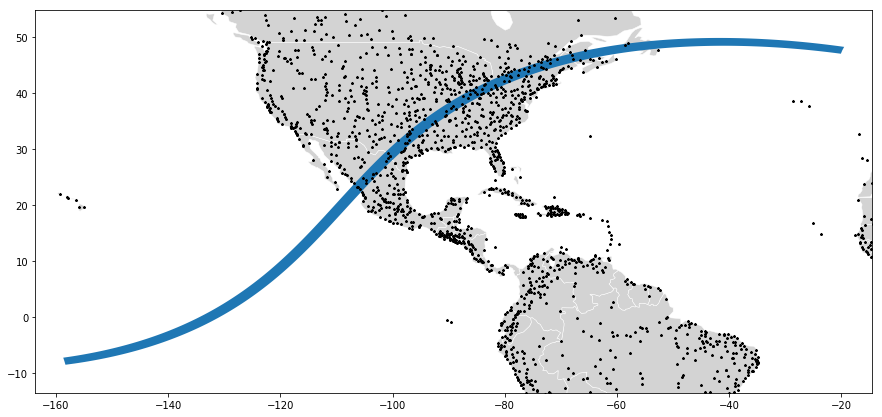

In [56]:
# Plot again, but this time I want to zoom in on that eclipse path
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base)
cities.plot(marker='*', color='black', markersize=5, ax=base)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

(-13.450309999999945, 54.82445000000007)

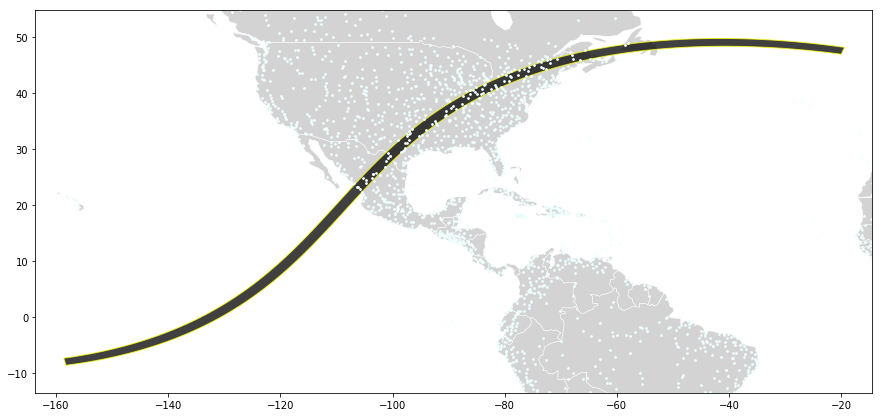

In [57]:
# Let's style the plot so that the eclipse looks eclipse-ier
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='o', color='azure', markersize=3, ax=base)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [58]:
# We can see that there are quite a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')
ecities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry,index_right,OID_,Name,Shape_Leng,Shape_Area,Year
584,Populated place,Paragould,United States of America,Arkansas,36.057087,-90.502884,23450,92.0,America/Chicago,Geonames ascii name + lat.d + long.d matching.,None,POINT (-90.5028843605005 36.05708721825965),5,0,Umbra,315.537741,253.727828,2024
616,Populated place,Cleburne,United States of America,Texas,32.351525,-97.392490,35545,233.0,America/Chicago,GeoNames match with ascii name + lat + long wh...,None,POINT (-97.39248966651769 32.35152528790633),5,0,Umbra,315.537741,253.727828,2024
627,Populated place,Arlington,United States of America,Texas,32.684761,-97.020238,724777,157.0,America/Chicago,Geonames ascii name + lat.d + long.d matching.,None,POINT (-97.02023848650327 32.68476076154036),5,0,Umbra,315.537741,253.727828,2024
641,Admin-1 capital,Montpelier,United States of America,Vermont,44.259972,-72.575813,8538,160.0,America/New_York,GeoNames match general.,None,POINT (-72.57581323412683 44.25997153632625),5,0,Umbra,315.537741,253.727828,2024
669,Populated place,Cape Girardeau,United States of America,Illinois,37.305822,-89.518087,40427,107.0,America/Chicago,Geonames ascii name + lat.d + long.d matching.,None,POINT (-89.51808659031434 37.30582236637662),5,0,Umbra,315.537741,253.727828,2024


(-13.450309999999945, 54.82445000000007)

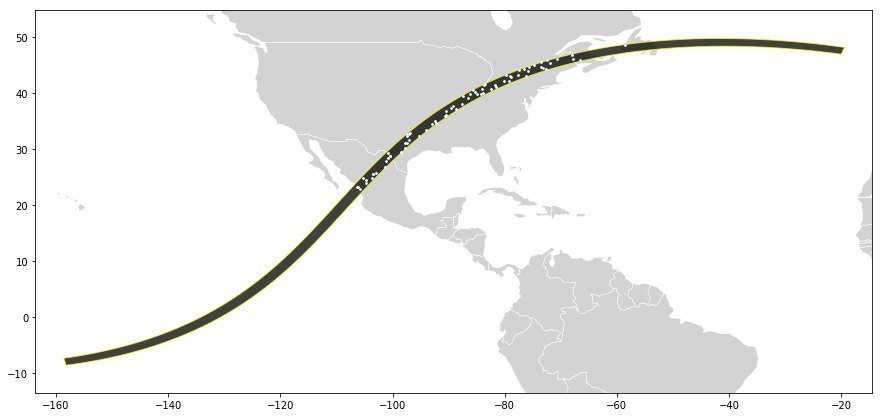

In [59]:
# Let's plot the results!
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(marker='o', color='azure', markersize=3, ax=base)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [60]:
print('Wow! There are {} cities in the eclipse path!'.format(len(ecities)))
print("Here are the largest 10:")
print(ecities.sort_values('POP', ascending = False)['NAME'].head(10))

Wow! There are 74 cities in the eclipse path!
Here are the largest 10:
6270          Dallas
6369        Montréal
5968       Cleveland
5963     San Antonio
5433       Ft. Worth
5447    Indianapolis
5435          Austin
5607         Torreón
5974         Buffalo
4285          Dayton
Name: NAME, dtype: object


(-13.450309999999945, 54.82445000000007)

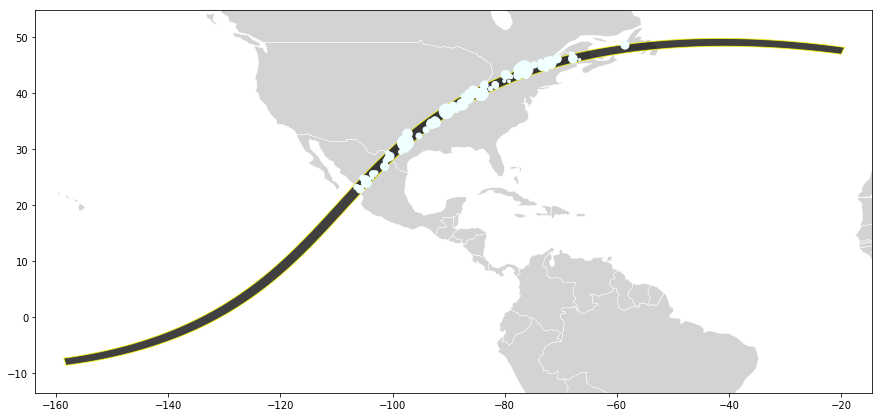

In [61]:
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(marker='o', color='azure', ax=base, markersize=cities['POP']/1000, legend=True)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

# Make it Slippy

## [Folium](https://python-visualization.github.io/folium/)

#### Binds the power of Python with leaflet.js

In [62]:
import folium

In [63]:
Petaluma = [38.23, -122.64]

osm_map = folium.Map(location=Petaluma, zoom_start=10)
osm_map

In [64]:
map_carto = folium.Map(
    location=Petaluma,
    tiles='Cartodb Positron',
    zoom_start=10
)
map_carto

In [65]:
map_stamen_toner = folium.Map(
    location=Petaluma,
    tiles='stamentoner',
    zoom_start=10
)
map_stamen_toner

In [66]:
map_stamen_water = folium.Map(
    location=Petaluma,
    tiles='stamenwatercolor',
    zoom_start=10
)
map_stamen_water

In [67]:
# Let's find the centroid of the eclipse we chose, so that we can center our folum map on it
x = myeclipse.centroid.x.values[0]
y = myeclipse.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

y: 26.719700290214362, x: -93.295094820787


In [68]:
map_stamen_water = folium.Map(
    location=[y,x],
    tiles='stamenwatercolor',
    zoom_start=3
)

folium.GeoJson(ecities,name='Eclipse Cities').add_to(map_stamen_water)
folium.GeoJson(myeclipse,name='Eclipse Path').add_to(map_stamen_water)

folium.LayerControl().add_to(map_stamen_water)

In [69]:
map_stamen_water

In [70]:
# You can write a function that creates a map with all of your properties
# This one creates popups for your cities

def plot_city_pop(ecities, myeclipse):
    # generate a new map
    folium_map = folium.Map(location=[y, x], zoom_start=3, tiles="stamenwatercolor")
    folium.GeoJson(myeclipse,name='Eclipse Path').add_to(folium_map)
    # for each row in the data, add a cicle marker
    for index, row in ecities.iterrows():
        
        # generate the popup message that is shown on click.
        popup_text = "Name: {}<br> Pop: {}"
        popup_text = popup_text.format(row["NAME"], row["POP"])
        
        folium.CircleMarker(location=(row['geometry'].y, row['geometry'].x),radius=6,popup=popup_text,fill=True).add_to(folium_map)        

    # Add a layer control if you like
    folium.LayerControl().add_to(folium_map)
    
    return folium_map

In [71]:
# Call the function to create the map
plot_city_pop(ecities, myeclipse)

In [72]:
# Saving your results as a Esri Shapefile is easy with GeoPandas
# myeclipse.to_file('../Data/myeclipse.shp', driver='ESRI Shapefile')
# ecities.to_file('../Data/ecities.shp', driver='ESRI Shapefile') 

## Maps that Mislead and Conclusions

![title](img/Election_map.jpg) 

![title](img/gerrymandering.jpg) 

![title](img/mercator_realsize.png) 

![title](img/LieWithMaps.png) 

<h1><p style="display: block; text-align: center;">Happy Mapping!</p></h1>

In [73]:
plot_city_pop(ecities, myeclipse)